# Concepts

Define notations:  

* $S_0$:= Current stock price. 
* $S_t$:= Stock price at time $t$. 
* $T$:= Time to expiration of option. 
* $c$:= Value of Euro call option to buy one share at current time. 
* $p$:= Value of Euro put option to sell one share at current time. 
* $r$:= Continuously compounded risk-free rate of interest for an investment maturing in time T. 
* $q$:= Continuously compounded dividend. 
* $K$:= Strike price of option. 
* $\Phi$:= The CDF of the Standard normal distribution. 
<!-- * $\sigma$:= The unit time std of log-return.  -->

### Put call parity [Hull, ch:11.4]

Assuming that there is no dividend, and that the call and put options have the same strike price, being $K$ at time $T$. 
The following relationship is called the *Put Call Parity*: 

$$c + Ke^{-rT} = p + S_0$$

### Implied Volatility [Hull, ch:15.11]

The volatility implied by option prices observed in the market is known as the *Implied Volatility*. Recall the Black-Scholes-Merton formula for the prices of Euro call and put options (*BSM pricing formula*, see [Hull, ch:15.8]): 

$$
c = S_0\Phi(d1) - Ke^{-rT}\Phi(d2)\; \text{  ,and  }\; p=KE^{-rT}\Phi(-d2)-S_0\Phi(-d1) \; . 
$$ 

Where 

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}} \qquad\text{and}\qquad
d_2 = d_1 - \sigma\sqrt{t} \; .
$$

The *Implied Volatility* is the value of $\sigma$, when substituded into the BSM pricing formula, produces the desired $c$ and $p$ with pre-determined $S_0$, $K$, $r$, and $T$. 

### Volatility Smile [Hull, ch:20]

A plot of implied volatility of an option with a certain life as a function of its strike price is known a *Volatility Smile*. 

This is the same for Euro Call and Put ([Hill, ch:20.1], a result of the Put Call Parity). 

### Jumps 

The *Jumps* are the non-continuous changes occur in the stock price, intuitively, the "sudden changes" impacting the stock, this is simulated with through the *Compounded Poisson Process* in our model. 

#### Poisson distribution

Let $\lambda$ be the *average rate of occurrence in unit time (i.e. intensity)*, the *Poisson Distribution with intensity $\lambda$*, denoted $X \sim Poison(\lambda)$ has pmf

$$
P(X=k) = \begin{cases}
        \frac{e^{-\lambda t} (\lambda t)^k}{k!} & k \in \mathbb{N}_{\geq 0} \\ 
        0 & o.w. 
\end{cases}
$$

Where $t$ is the time span, measured in unit time. Intuitively, the pmf of the Poisson distribution is the *probability of $k$ occurrence during the time span $t$*. 
We have that $\mathbb{E}[X]=Var(X)=\lambda t$. 

#### The Poisson process 

Let $N_t\in \mathbb{N}_{\geq 0}$ counts how many events (jumps, for our context) has occurred up to time $t$. Then for $h>0$, we have 

$$
P(N_{t+h}-N_t = k) = e^{-\lambda h}\frac{(\lambda h)^k}{k!}
$$

We have that $\mathbb{E}[N_t]=\lambda t$, and $Var(N_t)=\lambda t$. This $N_t$ is known as the *Poisson Process*. 

#### Compounded Poisson Process (CPP)

Let $\{{Y_k}\}_{k\geq 1}$ be i.i.d *log jump sizes*, independent of Poisson Process $N_{t}$'s. We define the *Compound Poisson Process (CPP)* as 

$$
J_t := \sum\limits^{N_t}_{k=1} Y_k 
$$

With convention that $J_t:=0$ when $N_t=0$. 

<!-- Intuitively, this provides the *sum of jump impact* in our context.  -->
Under the assumption that $\mathbb{E}[|Y|]<\infty$ (here $Y$ has the same distribution as any of the $Y_k$'s), we have: 

* $\mathbb{E}[J_t]=\lambda t \mathbb{E}[Y]$ 
* $Var(J_t)=\lambda t \mathbb{E}[Y^2]$

Both of above are received through simple algebra, with the linearity of expected value and law of total variance. 

The CPP will be applied as the *log jump of asset* (i.e. the jump happening at $k$, being $Y_k$, will multiply the asset value by $e^{Y_k}$). 

### Instantaneous Variance of return 
<!-- (Not sure) -->

The *instantaneous variance of return* is 

$$
v_t:=\lim\limits_{\Delta t \to 0} \frac{1}{\Delta t} Var(log(S_{t+\Delta t}) - log(S_t)|\mathcal{F}_t)\; \text{Without the non-continuous impact (i.e. ignoring jumps) over time span } \Delta t
$$

Where $\mathcal{F}_t$ is a filtration that can be understood at the *information up to time $t$*, to be concise, this means that the variance is conditioned on history ending at $t$. 

<!-- Intuitively, the instantaneous variance of return is the rate at with the continuous part of the log-returns accumulates variance.  -->

### Martingale 

A stochastic process $Y_t$ is a *Martingale* if for all $t$, we have: 
* $\mathbb{E}[|Y_t|]<\infty$. 
* $\mathbb{E}[Y_t|\{Y_{\tau}, \tau\leq s\}]=Y_s$ for all $s\leq t$. 

### Brownian motion 

The *Brownian motion* is a continuous stochastic process $W(t)$ for $t\geq 0$ where: 
* $W(0)=0$. 
* For any $0\leq t_0\leq t_1\leq, \cdots, t_n$, $W(t_{i+1})-W(t_{i})$'s are independent. 
* $W(t_{i+1})-W(t_{i})\sim \mathcal{N}(0,t_{i+1}-t_{i})$. 

A Brownian motion is necessarily a Martingale. 

### Generalized Wiener Process 

A *Stochastic Differential Equation (SDE)* is called *Generalized Wiener Process (GWP)* when it is in the form of 

$$
dX(t)=\mu(t, X(t))\;dt + \sigma(t,X(t))\;dW(t)
$$

Where $W(t)$ is a *Brownian motion* (We say this SDE is *driven by $W(t)$*), $\mu$ is called the *drift*, $\sigma$ is called the *diffusion*. ([StSh, ch:6.2]). 



We collect following properties of GWP: 

* A GWP is a *Martingale* iff the drift is zero. 

### Ito's Formula [StSh, ch:4.4]

If $f(t,x)$ has continuous partial derivatives once in $t$ and twice in $x$, then, for a GWP as in "Generalized Wiener Process" above: 

$$
df(t,X(t)) = f_t\;dt + f_xdX(t) + \frac{1}{2}f_{xx}(dX(t))^2 = (f_t + \mu f_x + \frac{1}{2} \sigma^2 f_{xx})dt + \sigma f_x dW(t) \; . 
$$

For a vector $X(t)\in \mathbb{R}^n$ (with $W(t)\in \mathbb{R}^m$) in form 

$$ 
dX(t)=\mu(t,X(t))\;dt + \Sigma(t,X(t))\;dW(t) \; ,
$$

let $a:=\Sigma(t,X(t))\Sigma(t,X(t))^{\top}$, 
the *Ito's formula* says: 

$$
df(t, X(t))=f_t\;dt + \nabla f^{\top} dX(t) + \frac{1}{2}Tr(a\nabla^2f) dt \; . 
$$

### Quadratic Covariation (Variance version can be seen at [StSh, ch:3.4.2])

Let $f_1$ and $f_2$ be a functions defined on $t\in [0,T]$. The *Quadratic Covariance* of pair $(f_1, f_2)$ up to time $T$ is 

$$
[f_1, f_2](T):=\lim\limits_{|\Pi|\to 0} \sum\limits_{j=0}^{n-1}(f_1(t_{j+1})-f_1(t_j))(f_2(t_{j+1})-f_2(t_j))\; ,
$$ 

where $\Pi:=\{0=t_0,\cdots, t_n=T\}$ with $t_{j}<t_{j+1}$. 

In context when $T$ is clear, we simply write $[f_1, f_2]$ instead, and often denote $d[f_1, f_2]:=df_1\; df_2$ (both sides in respect to $t$, "$dW_1(t)\;dW_2(t)=\rho\; dt$" in "Heston model (Risk neutral)" below is an example of this notation, see [StSh, ch:3.4.2] for more example of this notaion). 

### Heston model (Risk neutral)

In context of *Heston Model*, we define $X(t):=(S_t, v_t)^{\top}$ where 
* $S_t$:= Stock price at time $t$ 
* $v_t$:= *Instantaneous variance* of log return (same as instantaneous variance of simple return)

We also define the *Brownian Drivers* in current context: $W(t):=(W_1(t), W_2(t))^{\top}$ with $dW_1(t)\;dW_2(t)=\rho\; dt$ for $\rho\in [-1,1]$. 
$\rho$ is the instantaneous correlation between S_t and v_t. 

The GWP of *(Risk Neutral) Heston Model* is given by 

$$
dX(t)=b(X(t))dt + \Sigma(X(t))dW(t)\; ,
$$

where $b(S,v):=\begin{pmatrix}(r-q)S \\ \kappa (\theta - v)\end{pmatrix}$, and $\Sigma(S,v):=\begin{pmatrix}\sqrt{v}S & 0 \\ 0 & \sigma\sqrt{v}\end{pmatrix}$ with $\kappa$ being the speed of mean reversion of $v_t$, $\theta$ being the long run mean level of $v_t$, and $\sigma$ being the variance of $v_t$. 

The *Instantaneous Covariance* of $(dS_t, dv_t)$ is $\Sigma \begin{pmatrix}1 & \rho \\ \rho & 1\end{pmatrix} \Sigma^{\top} \; dt = \begin{pmatrix}v_tS_t^2 & \rho \sigma v_t S_t \\ \rho \sigma v_t S_t & \sigma^2 v\end{pmatrix}\; dt$

**Remark**: The "Risk Neutral" is achieved through the *Girsanov's Theorem* (e.g. see [StSh, ch:5.4.1]) by applying a change of measure from "Real world probability measure" to "risk-neutral measure $Q$". It should be noted that this is significant because the SDE for discounted price under the risk neutral model has zero drift, making it a Martingale. 

**Remark**: It is understood that **WE ARE CONSTANTLY OPERATING IN Q MEASURE!!!** To be more precise, we should have written, for instance, $\mathbb{P}^P$ and $\mathbb{P}^Q$ to distinguish between measures, but this is really not necessary unless we go deep into the math. Since our goal is to create a simulation, we will opt to assume that we are always within measure $Q$, in the sense that $\mathbb{P}:=\mathbb{P}^Q$ (and similar for other notations when applicable). 

### Bates model (Risk Neutral), the main reference for this topic is [DB]

#### The GWP SDE of Risk Neutral Bates Model 

Intuitively, the *Risk Neutral Bates Model* adds Jump impact (simulated with Poisson process) to the risk neutral Heston model. 

We inherit notations $S_t$, $v_t$, $\rho$, $\sigma$, $\kappa$, and $W(t)$ from the context of risk neutral Heston model. 

We add that: 
* $N\sim N_t$ being Poisson process with intensity $\lambda$ (As introduced in "The Poisson Process" above). 
* $Y\sim Y_k \sim\mathcal{N}(\mu_Y, \delta^2_Y)$ i.i.d, and independent of $(W_1(t), W_2(t), N)$. These $Y_k$'s are the *log jump* of the stock price (As introduced in "Compounded Poisson Process (CPP)" above). 
* $S_{t^-}:= \lim\limits_{s\to t} S_s$. 
* $\kappa_Y:=\mathbb{E}[e^Y-1]=e^{\mu_Y+\frac{1}{2}\delta^2_Y}-1$. 

The GWP of *Risk Neutral Bates Model* is (we will not be using the matrix form here): 

$$
dS_t = (r-q-\lambda\kappa_Y)S_{t^-}\; dt + \sqrt{v_t}S_{t^-}\;dW_1(t) + (e^Y - 1)S_{t^-}\; dN_t\;, \\ 
dv_t = \kappa(\theta - v_t)\; dt + \sigma\sqrt{v_t}\;dW_2(t)\; , \\ 
\text{ and } dW_1(t)dW_2(t)= \rho\; dt\; .
$$

We also provide the log price form (Received by applying the Ito's formula): 

$$
d(log(S_t))= (r-q-\lambda\kappa_Y-\frac{v_t}{2})\; dt + \sqrt{v_t}\; dW_1(t) + Y\; dN_t\; . 
$$

The *Instantaneous Covariance* of $(dS_t, dv_t)$ remains $\begin{pmatrix}v_tS_t^2 & \rho \sigma v_t S_t \\ \rho \sigma v_t S_t & \sigma^2 v\end{pmatrix}\; dt$. 

**Remark**: Let there be a jump at time $\tau$, then there is discontinuity in $S_{\tau}$, and we can express $S_{\tau}=S_{\tau^-}e^Y$. The jump adds discontinuity to $S_t$ only. 

#### "Solving" the SDE of Risk Neutral Bates Model 

We denote $X_t:= log(S_t)$ and take the integral: 

$$ 
X_T = X_0 + \int_0^T (r-q-\lambda\kappa_Y-\frac{1}{2}v_s)\;ds + \int_0^T \sqrt{v_s}\; dW_1(s) + \sum\limits_{k=1}^{N_T} T_k\; , \\ 
v_T = v_0 + \int_0^T\kappa(\theta - v_s)\; ds + \int_0^T\sigma\sqrt{v_s}\; dW_2(s)\; . 
$$

##### **We first focus on the Brownian pair $(W_1, W_2)$**: 

It must satisfy: 
$$
\mathbb{E}[\Delta W_*]=0\; , \text{ and } \; Var(\Delta W_*) = \Delta t\; . 
$$
Now, notice that 
$$
Cov(\Delta W_1, \Delta W_2) = \mathbb{E}[\Delta W_1 \Delta W_2] - \mathbb{E}[\Delta W1]\mathbb{E}[\Delta W_2] = \mathbb{E}[\Delta W_1 \Delta W_2]\; . 
$$
We observe with that (this is just product rule)
$$
\Delta (W_1 W_2) = W_1(t+\Delta t) W_2(t+\Delta t) - W_1(t)W_2(t) = W_1(t)\Delta W_2 + W_2(t)\Delta W_1 + \Delta W_1\Delta W_2\; . 
$$
By *Doob-Meyer characterization* of $[W_1,W_2]$, we have that 
$$
W_1W_2-[W_1,W_2] \text{ is a Martingale}\; ,   
$$
and this implies that 
$$
\mathbb{E}[\Delta(W_1 W_2)] = \mathbb{E}[\Delta[W_1, W_2]]\; .
$$
Since both $W_1$ and $W_2$ are Brownian motions (and hence, Martingales), we have 
$$
\mathbb{E}[\Delta W_1\Delta W_2]=\mathbb{E}[\Delta[W_1,W_2]]\; .
$$
This means that the Brownian pair must ALSO satisfy: 
$$
Cov(\Delta W_1, \Delta W_2)=\rho \Delta t\; . 
$$
By definition of Brownian motion and above, the pair $(\Delta W_1, \Delta W_2)$ is a bivariate normal distribution with covariance matrix 
$$
\begin{pmatrix}\Delta t & \rho \Delta t \\ \rho\Delta t & \Delta t\end{pmatrix}\; , 
$$
and mean $\mu=(0,0)^{\top}$. 
Solving $LL^{\top}=\begin{pmatrix}\Delta t & \rho \Delta t \\ \rho\Delta t & \Delta t\end{pmatrix}$, we have 
$$
L=\sqrt{\Delta t}\begin{pmatrix}1 & 0 \\ \rho & \sqrt{1-\rho^2}\end{pmatrix}\; . 
$$
**This allows us to simulate $(\Delta W_1, \Delta W_2)$** discretely with: 

Let $Z_1, Z_2 \sim \mathcal{N}(0,1)$ i.i.d.., we have that: 
$$
\begin{pmatrix}\Delta W_1 \\ \Delta W_2\end{pmatrix} = L \begin{pmatrix}Z_1 \\ Z_2\end{pmatrix} = \begin{pmatrix}\ \sqrt{\Delta t}Z_1\\ \rho\sqrt{\Delta t}Z_1 + \sqrt{1-\rho^2}\sqrt{\Delta t}Z_2 \end{pmatrix}\; . 
$$

#### **Creating the Volatility**: 
The key is noticing that we can NOT allow negative volatility, so we will have to "Force non-negativity" through 
$$
v^+_n:=max(v_n, 0)\; . 
$$
And we have 
$$
v_{n+1} = v_n + \kappa(\theta - v_n^+)\Delta t + \sigma\sqrt{v_n^+} \Delta W_2\; 
$$
in the time-recursive update before we set $v_{n+1}^+:= max(v_{n+1},0)$. 

Notice that, unfortunately, this can not be done in a "vectorized" way. 

#### **We move on the considering the jumps between $[t_{n}, t_{n+1}]$**: 

Between time steps $t_n$ and $t_{n+1}$, we have: 
* Number of jumps: $K\sim Poisson(\lambda \Delta t)$. 
* Given that $K$ is positive, we draw $Y_1,\cdots, Y_K\sim \mathcal{N}(\mu_Y, \delta^2_Y)$ i.i.d.. 
* Given $K$ positive, we have the *compounded jump* between the two time steps be 
$$
\Delta Y = (\sum\limits_{k=1}^{K} Y_k) \sim \mathcal{N}(K\mu_Y, K\delta^2_Y)\; . 
$$
* And $\Delta Y=0$ if $K=0$. 

#### **Bring everything together to create the time recursive model**: 
We have 
$$
X_{n+1} = X_n + (r-q-\lambda\kappa_Y - \frac{v_n^+}{2})\Delta t + \sqrt{v_n^+}\Delta W_1 + \Delta Y\; . 
$$
And then $S_{n+1}= e^{X_{n+1}}$. 

We summarize what has to be done in the simulation of stock prices: 
* Create the discrete Brownian pairs according the $\Delta t$. 
* The $v_n$'s have to be done in the time-recursive way. 
* The jumps between time steps can be created in a vectorized way. 
* The difference between $X_n$'s and the next can be created in a vectorized way. Then the $X_n$'s can be created with a np.cumsum before used as power of $e$ to create the actual stock price $S_n$'s. 

In [12]:
import importlib 
import sys 

sys.path.append("../")

from proj_mod import stock_sim 
importlib.reload(stock_sim); 

In [13]:
vol_param=stock_sim.Vol_params(kappa=1.5, theta=0.04, sigma=0.5, rho=-0.7, v0=0.04)
jump_param=stock_sim.Jump_params(lam_J=1, mu_J=0, sig_J=0.1)
market_param=stock_sim.Market_params(r=0.05, q=0.05)
Bates_param=stock_sim.Bates_params(s0=100, vol=vol_param, jump=jump_param, market=market_param)

Bates_model=stock_sim.Bates_model_risk_free(params=Bates_param)

In [14]:
Bates_model.bates_create_paths(n_paths=10, n_steps=252, time_len=1, seed=420)

In [15]:
Bates_model.S_

array([[100.        ,  99.43171554,  97.78279241, ..., 100.31104284,
         99.90193214, 100.52294218],
       [100.        , 100.79737538,  99.50113908, ..., 124.38751831,
        124.25854551, 124.40836167],
       [100.        , 100.53673532, 103.29087728, ..., 108.31471271,
        108.33618733, 108.77875271],
       ...,
       [100.        , 100.20451698,  98.45919691, ...,  85.03899969,
         85.70053843,  86.63327853],
       [100.        ,  98.89506113,  99.15187828, ...,  95.92834215,
         93.54549096,  95.57100711],
       [100.        , 101.23456944, 101.58681072, ..., 112.82721571,
        112.82854197, 113.08441867]])

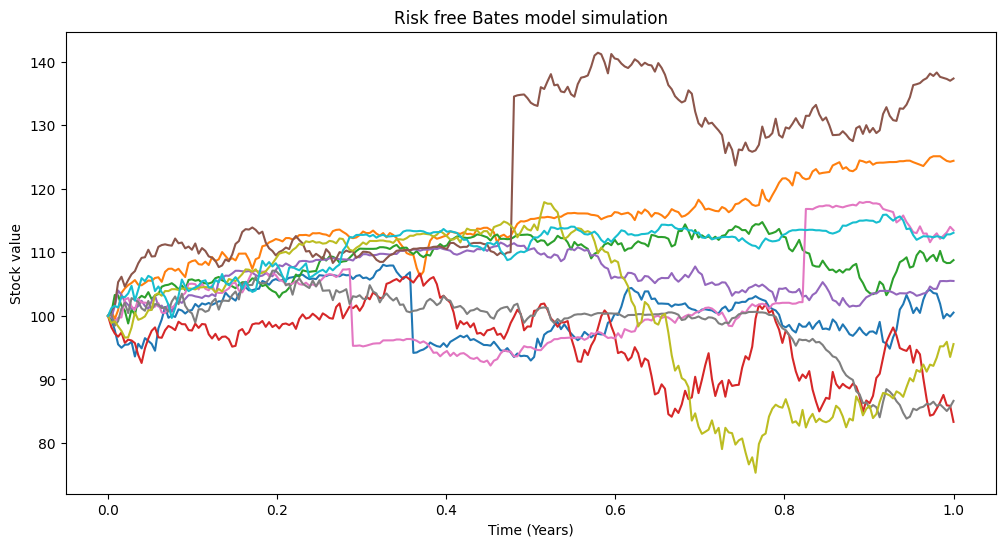

In [16]:
Bates_model.draw_paths()

### Estimated Call option payoff under risk neutral Bates model. 

#### **Monte Carlo (MC) method**  

With MC method, the *call option price (discounted to time 0)* is 
$$
C_0=e^{-rT}\mathbb{E}[max(S_T-K,0)]\; ,
$$
where $K$ is the *Strike Price*, we will estimate this with mean of $max(S_T-K,0)$. And the estimated std is 
$$
\hat{std}_{\hat{C_0}} = e^{-rT}\frac{\hat{std}(max(S_T-K,0))}{\sqrt{N}}\; , 
$$
where $N$ is the number of simulated paths. 

In [17]:
import importlib 
import numpy as np
import sys 

sys.path.append("../")

from proj_mod import stock_sim 
importlib.reload(stock_sim); 

vol_param=stock_sim.Vol_params(kappa=1.5, theta=0.04, sigma=0.5, rho=-0.7, v0=0.04)
jump_param=stock_sim.Jump_params(lam_J=1, mu_J=0, sig_J=0.1)
market_param=stock_sim.Market_params(r=0.05, q=0.05)
Bates_param=stock_sim.Bates_params(s0=100, vol=vol_param, jump=jump_param, market=market_param)

Bates_model=stock_sim.Bates_model_risk_free(params=Bates_param)

Bates_model.bates_create_paths(n_paths=1000, n_steps=252, time_len=1, seed=420)

In [18]:
Bates_model.bates_est_call_payoff_MC(strike_price=np.array([100,110]), time_len=1, save_payoff=True)

,K,C_0_mu,C_0_std
0,100.0,7.571021,0.343997
1,110.0,3.518634,0.247318


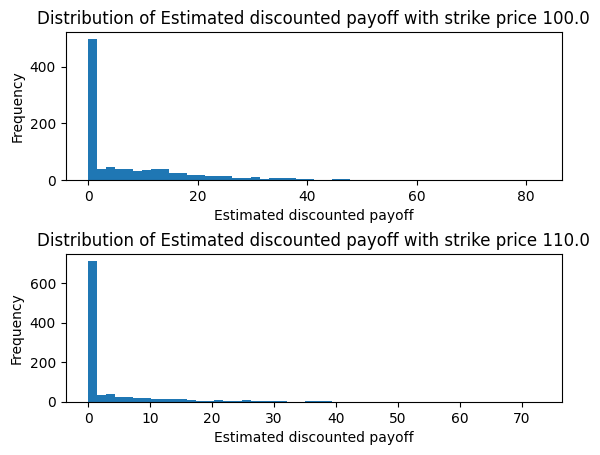

In [22]:
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(2,1)

axs[0].hist(Bates_model.call_MC_payoff_[list(Bates_model.call_MC_payoff_.keys())[0]], bins=50)
axs[0].set_title(f"Distribution of Estimated discounted payoff with strike price {list(Bates_model.call_MC_payoff_.keys())[0]}")
axs[0].set_xlabel("Estimated discounted payoff")
axs[0].set_ylabel("Frequency")

axs[1].hist(Bates_model.call_MC_payoff_[list(Bates_model.call_MC_payoff_.keys())[1]], bins=50)
axs[1].set_title(f"Distribution of Estimated discounted payoff with strike price {list(Bates_model.call_MC_payoff_.keys())[1]}")
axs[1].set_xlabel("Estimated discounted payoff")
axs[1].set_ylabel("Frequency")

plt.subplots_adjust(hspace=0.5)

plt.show()

#### **"Closed" formula for call payoff estimation**

First, consider fact that 
$$
max(S_T-K,0) = S_T\mathbb{1}_{\{S_T>K\}} - K\mathbb{1}_{\{S_T>K\}}\; , 
$$
where $\mathbb{1}_{*}$ is the *identifier function* that returns $1$ iff $*$ is true and 0 otherwise. 
We have 
$$
C_0 = e^{-rT}\mathbb{E}[S_T\mathbb{1}_{S_T>K}] - Ke^{-rT}\mathbb{E}[\mathbb{1}_{S_T>K}]\; .
$$
The key to solving for the "closed" formula is now reduced to solving for $\mathbb{E}[S_T\mathbb{1}_{S_T>K}]$ and $\mathbb{E}[\mathbb{1}_{S_T>K}]=\mathbb{P}(S_T>K)$. 

#### **Solving with the characteristic function**
We use notation $X_T:=log(S_T)$ and $k:=log(K)$. We define 
$$
\phi(u,T):=\mathbb{E}[e^{iuX_T}] = \int_{-\infty}^{\infty}e^{iuX_T}p(X_T)\;dX_T\; ,
$$
for $u\in \mathbb{R}$ and $p$ being the pdf of distribution of $X_T$, to be the *Characteristic function*. Under the context of Bates (and Heston) model, we may further allow $u\in \mathbb{C}$. 
*Fourier inverting* the *Fourier Form* of $\mathbb{1}_{\{y>0\}}$ (this identifier function is also called the "*Heaviside step function*", often denoted as "$H(y)$"), we have that (for arbitrary $x$ and $k$) 
$$
\mathbb{1}_{\{x-k>0\}}=\frac{1}{2} + \frac{1}{\pi}\int_{0}^{\infty}\frac{sin(u(x-k))}{u}\;du = \frac{1}{2} + \frac{1}{\pi}Real(\int_{0}^{\infty}\frac{e^{iu(x-k)}}{iu}\; du)\; . 
$$
Now, observe that 
$$
\mathbb{E}[\mathbb{1}_{\{X_T> k\}}] = \frac{1}{2} + \frac{1}{\pi}Real(\int_0^{\infty}\frac{e^{-iuk}\; \mathbb{E}[e^{iuX_T}]}{iu}\; du) =  \frac{1}{2} + \frac{1}{\pi}Real(\int_0^{\infty}\frac{e^{-iuk}\; \phi(u,T)}{iu}\; du)\; . 
$$

We do similar thing for $\mathbb{E}[S_T\mathbb{1}_{S_T>K}]$, first, consider that, for arbitrary $x$ and $k$, we have 
$$
e^x\mathbb{1}_{x>k}=\frac{e^x}{2}+e^k(\frac{1}{\pi}Real(\int_0^{\infty} \frac{e^{(1+iu)(x-k)}}{iu}\; du))\; .
$$
We, thus, have 
$$
\mathbb{E}[S_T\mathbb{1}_{S_T>K}]=\mathbb{E}[e^{X_T}\mathbb{1}_{\{X_T>k\}}]=\frac{\mathbb{E}[e^{X_T}]}{2} + \frac{1}{\pi}Real(\int_0^{\infty}\frac{e^{-iuk}\mathbb{E}[e^{(1+iu)X_T}]}{iu}\; du) = \frac{\phi(-i,T)}{2} + \frac{1}{\pi}Real(\int_0^{\infty}\frac{e^{-iuk}\phi(u-i, T)}{iu}\; du)\; .
$$
Further, notice that $\phi(-i,T)=\mathbb{E}[e^{X_T}]=S_0e^{(r-q)T}$ (this is a result from the following part of "Simulation for the characteristic function method"'s equation for $\phi(u,T)$ in the last item in step 1), we have 
$$
\mathbb{E}[S_T\mathbb{1}_{S_T>K}]=S_0e^{(r-q)T}(\frac{1}{2} + \frac{1}{\pi}Real(\int_0^{\infty}\frac{e^{-iuk}\phi(u-i,T)}{iu\phi(-i,T)}\; du))\; . 
$$

#### **Simulation for the characteristic function method [DB] [HPWJ] [RCPT]** 

We do this step by step as below: 

1. Calculate the characteristic function $\phi(u,T)$: 
    - Calculate $\alpha:= -u^2-iu$, and $\beta:=\kappa - \rho\sigma i u$. 
    - Calculate $d(u):=\sqrt{\beta^2 - \alpha\sigma^2}$, and then $g(u):=\frac{\beta - d(u)}{\beta + d(u)}$. 
    - Calculate 
    $$
    C(u,T):=\frac{\kappa\theta}{\sigma^2}((\beta-d(u))T - 2log(\frac{1-g(u)e^{-d(u)T}}{1-g(u)}))\; , \text{ and } D(u,T):=\frac{(\beta - d(u))(1-e^{-d(u)T})}{\sigma^2(1-g(u)e^{-d(u)T})}\; . 
    $$
    - Calculate $\phi(u,T)$ as 
    $$
    \phi(u,T)=exp(iu(log(S_0) + (r-q-\lambda\kappa_Y)T) + C(u,T) + D(u,T)v_0)\times exp(\lambda T (exp(iu\mu_Y-\frac{u^2\delta^2_Y}{2})-1))\; .
    $$

2. Calculate (approximate) the integrals $\mathbb{E}[S_T\mathbb{1}_{S_T>K}]$ and $\mathbb{E}[\mathbb{1}_{S_T>K}]=\mathbb{P}(S_T>K)$ as: 
$$
\mathbb{E}[S_T\mathbb{1}_{S_T>K}]\approx E_1:=S_0e^{(r-q)T}(\frac{1}{2} + \frac{1}{\pi}\sum\limits_m w_m\; Real(\frac{e^{-iu_mk}\phi(u_m-i,T)}{iu_m\phi(-i,T)}))\; , \text{ and } \mathbb{E}[\mathbb{1}_{S_T>K}]\approx E_2:=\frac{1}{2} + \frac{1}{\pi}\sum\limits_m w_m\; Real(\frac{e^{-iu_mk}\phi(u_m,T)}{iu_m})\; , 
$$
where $u_m:=m\;\Delta u$ for $m\in [1, n]$ and $w_m$ are weights for different rules for integral approximation (e.g. trapezoid rule has $w_1=w_n=\frac{\Delta u}{2}$, $w_m=\Delta u$ for $m\in[2, n-1]$). 
As a comment, in many texts, they use $P_1:=\frac{E_1}{S_0e^{(r-q)T}}$ and $P_2:=E_2$. 

3. Approximate 
$$
C_0 \approx e^{-rT}E_1 - Ke^{-rT}E_2 = S_0 e^{-qT}P_1 - Ke^{-rT}P2\; .
$$

In [1]:
import importlib 
import numpy as np
import sys 

sys.path.append("../")

from proj_mod import stock_sim 
importlib.reload(stock_sim); 

vol_param=stock_sim.Vol_params(kappa=1.5, theta=0.04, sigma=0.5, rho=-0.7, v0=0.04)
jump_param=stock_sim.Jump_params(lam_J=1, mu_J=0, sig_J=0.1)
market_param=stock_sim.Market_params(r=0.05, q=0.05)
Bates_param=stock_sim.Bates_params(s0=100, vol=vol_param, jump=jump_param, market=market_param)

no_jump_param=stock_sim.Jump_params(lam_J=0, mu_J=0, sig_J=0)
Heston_param=stock_sim.Bates_params(s0=100, vol=vol_param, jump=no_jump_param, market=market_param)

strike_price=np.array([100,110])
time_len=1

Bates_model=stock_sim.Bates_model_risk_free(params=Bates_param)
Heston_model=stock_sim.Bates_model_risk_free(params=Heston_param)

Bates_model.bates_create_paths(n_paths=10000, n_steps=252, time_len=1, seed=420)
Heston_model.bates_create_paths(n_paths=10000, n_steps=252, time_len=1, seed=420)

Bates_model.bates_est_call_payoff_MC(strike_price=strike_price, time_len=time_len, save_payoff=True)
Heston_model.bates_est_call_payoff_MC(strike_price=strike_price, time_len=time_len, save_payoff=True)

Bates_model.bates_est_call_payoff_CF(strike_price=strike_price, time_len=time_len, u_max=800, du=1e-2)
Heston_model.bates_est_call_payoff_CF(strike_price=strike_price, time_len=time_len, u_max=800, du=1e-2); 

In [2]:
Heston_model.call_CF_

,K,P_1,P_2,C_0
0,100.0,0.639244,0.569122,6.670225
1,110.0,0.364927,0.308216,2.462643


In [3]:
Heston_model.call_MC_

,K,C_0_mu,C_0_std
0,100.0,6.717036,0.087005
1,110.0,2.543083,0.054948


In [4]:
Heston_model.call_MC_payoff_

{np.float64(100.0): array([15.97076314, 23.81262719,  8.8705733 , ..., 10.63447133,
        20.22932091,  9.74831686]),
 np.float64(110.0): array([ 6.4584689 , 14.30033295,  0.        , ...,  1.12217708,
        10.71702666,  0.23602261])}

In [5]:
Bates_model.call_CF_

,K,P_1,P_2,C_0
0,100.0,0.611517,0.531051,7.654186
1,110.0,0.383344,0.313771,3.633373


In [6]:
Bates_model.call_MC_

,K,C_0_mu,C_0_std
0,100.0,7.642101,0.110695
1,110.0,3.637309,0.079835


In [7]:
Bates_model.call_MC_payoff_

{np.float64(100.0): array([15.41529693, 23.21795183,  0.        , ...,  6.92385328,
        14.17052562,  9.84962419]),
 np.float64(110.0): array([ 5.90300269, 13.70565758,  0.        , ...,  0.        ,
         4.65823138,  0.33732995])}

### Calculating the Delta $\frac{\partial C_0}{\partial S_0}$ 

#### **Cheating like reasoning**
It is known that $\frac{\partial C_0}{\partial S_0}=e^{-qT}P_1$ for Heston model. Observe that all jump factors added to $P_1$ and $P_2$ to generalize them from the Heston model to the Bates model are independent of $S_0$. We will, hence, still have 
$$
\frac{\partial C_0}{\partial S_0} = e^{-qT}P_1 
$$
for the case of Bates models. 

#### **A summary of the actual reasoning**

Recall the definition of 
$$
C_0=e^{-rT}\mathbb{E}[max(S_T-K,0)]\; . 
$$
We now denote $M:=log(\frac{S_T}{S_0})$ (i.e. $S_T=S_0e^{M}$) and observe that 
$$
C_0=e^{-rT}\mathbb{E}[max(S_0e^{M}-K, 0)]=e^{-rT}\mathbb{E}[(S_0e^{M}-K)\mathbb{1}_{S_T>K}]\; . 
$$
Take derivative on both sides in respect to $S_0$ ("bring" the product rule into the expected value), we have 
$$
\frac{\partial C_0}{\partial S_0} = e^{-rT}\mathbb{E}[e^{M}\mathbb{1}_{S_T>K}] + e^{-rT}\mathbb{E}[(S_0e^M-K)\delta(S_0e^M-K)e^M]\; , 
$$
where $\delta$ is the *Dirac delta function* (derivative to the Heaviside step function $\mathbb{1}_{*>0}$), notice, also, that due to the fact the $d(log(S_T))$ has no $S_0$ in it, law of $M$ does not depend on $S_0$. 
Dirac delta function has *shifting property* $\int_{-\infty}^{\infty}f(x)\delta(x-x_0)dx=f(x_0)$, which results in 
$$
\mathbb{E}[(S_0e^M-K)\delta(S_0e^M-K)e^M] = 0\; , 
$$
and so, 
$$
\frac{\partial C_0}{\partial S_0} = e^{-rT}\mathbb{E}[e^{M}\mathbb{1}_{S_T>K}] = e^{-qT}P_1\; . 
$$

In [8]:
Bates_model.bates_est_call_Delta_CF(strike_price=strike_price, time_len=time_len, u_max=800, du=1e-2)
Heston_model.bates_est_call_Delta_CF(strike_price=strike_price, time_len=time_len, u_max=800, du=1e-2); 

In [10]:
Bates_model.call_Delta_CF_

,K,call_Delta
0,100.0,0.581693
1,110.0,0.364649


In [11]:
Heston_model.call_Delta_CF_

,K,call_Delta
0,100.0,0.608068
1,110.0,0.347129


### Calculating the Delta for all steps (preparation for hedging simulation) 

Calculating Delta for all steps with each $S$ (the *current spot price*) can be very computation consuming if we calculate each characteristic function on its own. But we can notice that the equation for Delta does not really rely on $S$ as anything other than within a constant. Observe that, if we set $\zeta:= ln(\frac{K}{S})$, we will have that 
$$
P_1=\frac{1}{2} + \frac{1}{\pi}\int_{0}^{\infty} Real(e^{-iu\zeta} A_1(u,T))\; du\; \text{, where } A_1(u, T):= \frac{\tilde{\phi}(u-i, T)}{iu \tilde{\phi}(-i, T)}\; , 
$$
where the "characteristic functions" $\tilde{\phi}$'s within $A_1$ can be taken as 
$$
\tilde{\phi}(u,T):=exp(iu(r-q-\lambda\kappa_Y)T + C(u,T) + D(u,T)v_0)\times exp(\lambda T (exp(iu\mu_Y-\frac{u^2\delta^2_Y}{2})-1))\; , 
$$
that is, the original characteristic functions $\phi$'s without any $S_0$ (or $S$, for current context).  

In [1]:
import importlib 
import numpy as np
import sys 

sys.path.append("../")

from proj_mod import stock_sim 
importlib.reload(stock_sim); 

vol_param=stock_sim.Vol_params(kappa=1.5, theta=0.04, sigma=0.5, rho=-0.7, v0=0.04)
jump_param=stock_sim.Jump_params(lam_J=1, mu_J=0, sig_J=0.1)
market_param=stock_sim.Market_params(r=0.05, q=0.05)
Bates_param=stock_sim.Bates_params(s0=100, vol=vol_param, jump=jump_param, market=market_param)

no_jump_param=stock_sim.Jump_params(lam_J=0, mu_J=0, sig_J=0)
Heston_param=stock_sim.Bates_params(s0=100, vol=vol_param, jump=no_jump_param, market=market_param)

strike_price=np.array([100,110])
time_len=1

Bates_model=stock_sim.Bates_model_risk_free(params=Bates_param)
Heston_model=stock_sim.Bates_model_risk_free(params=Heston_param)

Bates_model.bates_create_paths(n_paths=1000, n_steps=252, time_len=1, seed=420)
Heston_model.bates_create_paths(n_paths=1000, n_steps=252, time_len=1, seed=420)

In [2]:
Bates_model.bates_est_call_Delta_CF(strike_price=strike_price, time_len=time_len, u_max=100, du=0.1)

,K,call_Delta
0,100.0,0.581067
1,110.0,0.366619


In [3]:
Bates_model._bates_Call_Delta_mat_all_step_(strike_price=strike_price)

In [4]:
Bates_model.call_Delta_all_steps_

array([[[ 0.58106684,  0.56980546,  0.53508146, ...,  0.80041661,
          0.91672709,  0.93452088],
        [ 0.58106684,  0.59653235,  0.57126827, ...,  0.99237037,
          0.99088602,  0.98747914],
        [ 0.58106684,  0.59157201,  0.6409066 , ...,  0.99513197,
          0.99478461,  0.99485136],
        ...,
        [ 0.58106684,  0.57516234,  0.559334  , ...,  0.00798161,
         -0.00204977, -0.00978467],
        [ 0.58106684,  0.59052363,  0.56596273, ...,  0.00675182,
          0.01222706,  0.02347489],
        [ 0.58106684,  0.6149267 ,  0.66112565, ...,  0.00639869,
          0.00737258,  0.01366313]],

       [[ 0.36661919,  0.35258498,  0.31280924, ...,  0.00960521,
          0.01368122,  0.017426  ],
        [ 0.36661919,  0.38521234,  0.35377499, ...,  0.99594122,
          1.000453  ,  1.00898316],
        [ 0.36661919,  0.3790006 ,  0.44330264, ...,  0.2970678 ,
          0.21439447,  0.15916813],
        ...,
        [ 0.36661919,  0.35895765,  0.33983324, ...,  

Above has shape (num K, num paths, num steps). 

In [5]:
Bates_model.call_Delta_all_steps_.shape

(2, 1000, 252)

### A simulated hedging at every step 

In [6]:
Bates_model.bates_hedged_stock_income_all_step(strike_price=strike_price)

In [7]:
Bates_model.bates_call_payoffs(strike_price=strike_price);

In [8]:
Bates_model.bates_call_payoffs_

array([[ 2.62925234, 20.63713185,  8.35060789, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 11.12483761,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [9]:
Bates_model.bates_est_call_payoff_CF(strike_price=strike_price, time_len=time_len, u_max=100, du=0.1);

In [10]:
Bates_model.call_CF_

,K,P_1,P_2,C_0
0,100.0,0.610859,0.531767,7.523448
1,110.0,0.385416,0.317217,3.469868


In [11]:
Bates_model.bates_hedged_stock_income_all_step_

array([[ -3.56866172,  15.99968414,   4.57900953, ..., -13.63525412,
         -8.39536648, -10.30646328],
       [ -3.90076281,  12.011897  ,   1.06348522, ...,  -5.60977527,
         -4.08534567,  -4.75845767]])

Below is the liability of the call option saller according to simulations. 

In [12]:
hedged_call_payoff=Bates_model.bates_call_payoffs_ - Bates_model.bates_hedged_stock_income_all_step_

(array([125., 313., 316., 177.,  38.,  18.,   8.,   3.,   1.,   1.]),
 array([ 1.58115072,  4.23416852,  6.88718632,  9.54020411, 12.19322191,
        14.84623971, 17.4992575 , 20.1522753 , 22.80529309, 25.45831089,
        28.11132869]),
 <BarContainer object of 10 artists>)

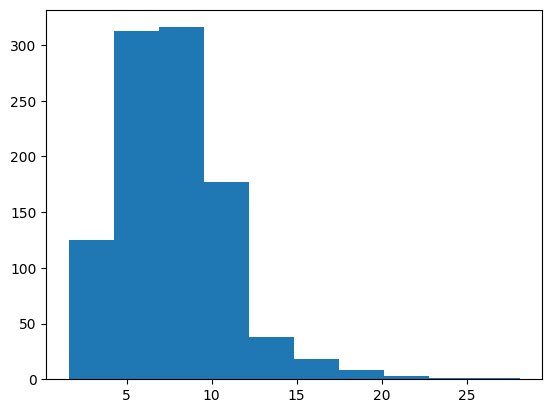

In [13]:
import matplotlib.pyplot as plt 

plt.hist(hedged_call_payoff[0])

(array([ 58., 177., 241., 349., 116.,  33.,  14.,   9.,   1.,   2.]),
 array([-3.20547258, -0.87967776,  1.44611707,  3.7719119 ,  6.09770672,
         8.42350155, 10.74929637, 13.0750912 , 15.40088603, 17.72668085,
        20.05247568]),
 <BarContainer object of 10 artists>)

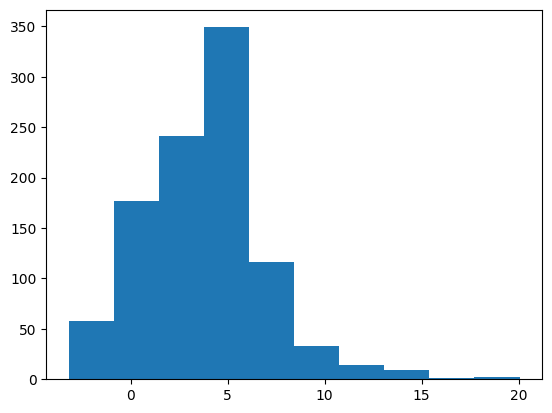

In [14]:
plt.hist(hedged_call_payoff[1])

Below is what the call option seller "income" if price the option at the $C_0$ with characteristic function method. 

In [15]:
mark_maker_hedged_profit=Bates_model.call_CF_["C_0"].to_numpy()[:, None] - hedged_call_payoff

(array([  1.,   1.,   3.,   8.,  18.,  38., 177., 316., 313., 125.]),
 array([-20.58788101, -17.93486321, -15.28184541, -12.62882762,
         -9.97580982,  -7.32279202,  -4.66977423,  -2.01675643,
          0.63626137,   3.28927916,   5.94229696]),
 <BarContainer object of 10 artists>)

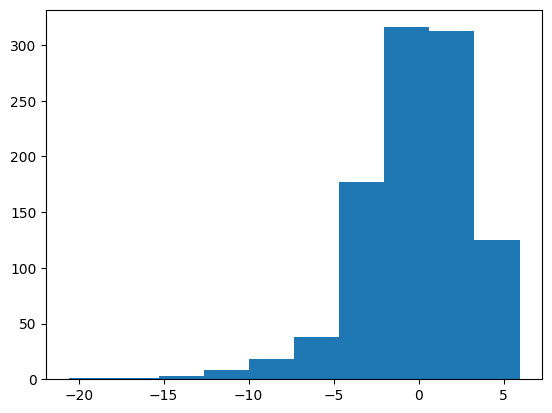

In [16]:
plt.hist(mark_maker_hedged_profit[0])

(array([  2.,   1.,   9.,  14.,  33., 116., 349., 241., 177.,  58.]),
 array([-16.58260783, -14.25681301, -11.93101818,  -9.60522336,
         -7.27942853,  -4.9536337 ,  -2.62783888,  -0.30204405,
          2.02375077,   4.3495456 ,   6.67534043]),
 <BarContainer object of 10 artists>)

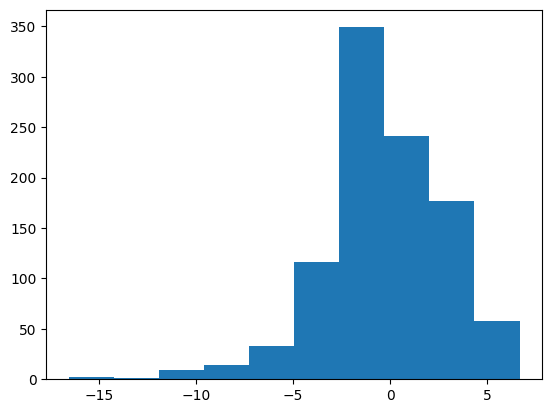

In [17]:
plt.hist(mark_maker_hedged_profit[1])

# References 

[Hull] Options, Futures, and Other Derivatives, John C Hull 

[StSh] Stochstic Calculus for Finance II, Steven E Shreve

[DB] Jumps and Stochastic Volatility: Exchange Rate Processes Implicit in Deutsche Mark Options, David S Bates 

[HPWJ] The Little Heston Trap, Hansj¨org Albrecher, Philipp Mayer, Wim Schoutens, and Jurgen Tistaert

[RCPT] Financial Modeling With Jump Process, Rama Cont and Peter Tankov 